In [66]:
# loeme sisse document-term matrix
import pandas as pd

data = pd.read_pickle('pickles/ignitisdtm.pkl')
data = data.transpose()
data.head()

,ignitis2020_q1_en_eur_con_ias.txt,ignitis2020_q2_en_eur_con_ias.txt,ignitis2020_q2_en_eur_con_ias_00.txt,ignitis2020_q3_en_eur_con_ias.txt
ab,52,134,133,185
abbr,2,0,2,2
abbreviation,1,1,1,0
ability,0,2,0,0
able,1,3,6,4


In [67]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'ignitis2020_q1_en_eur_con_ias.txt': [('company', 262),
  ('group', 245),
  ('eur', 210),
  ('electricity', 188),
  ('ignitis', 182),
  ('financial', 181),
  ('uab', 167),
  ('million', 148),
  ('interim', 143),
  ('gas', 131),
  ('board', 131),
  ('current', 107),
  ('vilnius', 100),
  ('management', 97),
  ('statements', 93),
  ('net', 90),
  ('adjusted', 89),
  ('revenue', 88),
  ('generation', 86),
  ('assets', 86),
  ('lithuania', 83),
  ('companys', 82),
  ('customers', 79),
  ('non', 78),
  ('apm', 78),
  ('income', 76),
  ('march', 74),
  ('member', 73),
  ('report', 72),
  ('period', 72)],
 'ignitis2020_q2_en_eur_con_ias.txt': [('company', 369),
  ('eur', 278),
  ('ignitis', 253),
  ('financial', 222),
  ('group', 210),
  ('million', 186),
  ('uab', 181),
  ('interim', 174),
  ('electricity', 167),
  ('board', 151),
  ('ab', 134),
  ('june', 130),
  ('management', 122),
  ('statements', 118),
  ('companys', 117),
  ('period', 111),
  ('vilnius', 104),
  ('lithuania', 104),
  

In [68]:

# top 15 sõna
for quarters, top_words in top_dict.items():
    print(quarters)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

ignitis2020_q1_en_eur_con_ias.txt
company, group, eur, electricity, ignitis, financial, uab, million, interim, gas, board, current, vilnius, management
---
ignitis2020_q2_en_eur_con_ias.txt
company, eur, ignitis, financial, group, million, uab, interim, electricity, board, ab, june, management, statements
---
ignitis2020_q2_en_eur_con_ias_00.txt
group, company, financial, eur, electricity, ignitis, interim, million, gas, june, lithuania, statements, board, management
---
ignitis2020_q3_en_eur_con_ias.txt
company, group, financial, eur, ignitis, electricity, uab, september, interim, million, period, companys, statements, ab
---


In [90]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each quarter
words = []
for quarters in data.columns:
    top = [word for (word, count) in top_dict[quarters]]
    for t in top:
        words.append(t)
words

ignitis2020_q1_en_eur_con_ias.txt
ignitis2020_q2_en_eur_con_ias.txt
ignitis2020_q2_en_eur_con_ias_00.txt
ignitis2020_q3_en_eur_con_ias.txt


['company',
 'group',
 'eur',
 'electricity',
 'ignitis',
 'financial',
 'uab',
 'million',
 'interim',
 'gas',
 'board',
 'current',
 'vilnius',
 'management',
 'statements',
 'net',
 'adjusted',
 'revenue',
 'generation',
 'assets',
 'lithuania',
 'companys',
 'customers',
 'non',
 'apm',
 'income',
 'march',
 'member',
 'report',
 'period',
 'company',
 'eur',
 'ignitis',
 'financial',
 'group',
 'million',
 'uab',
 'interim',
 'electricity',
 'board',
 'ab',
 'june',
 'management',
 'statements',
 'companys',
 'period',
 'vilnius',
 'lithuania',
 'gas',
 'report',
 'yes',
 'shares',
 'energy',
 'total',
 'adjusted',
 'current',
 'cash',
 'generation',
 'apm',
 'increased',
 'group',
 'company',
 'financial',
 'eur',
 'electricity',
 'ignitis',
 'interim',
 'million',
 'gas',
 'june',
 'lithuania',
 'statements',
 'board',
 'management',
 'assets',
 'uab',
 'ab',
 'period',
 'current',
 'year',
 'vilnius',
 'cash',
 'income',
 'total',
 'consolidated',
 'non',
 'customers',
 'net',


In [70]:
Counter(words).most_common()


[('company', 4),
 ('group', 4),
 ('eur', 4),
 ('electricity', 4),
 ('ignitis', 4),
 ('financial', 4),
 ('uab', 4),
 ('million', 4),
 ('interim', 4),
 ('gas', 4),
 ('current', 4),
 ('vilnius', 4),
 ('management', 4),
 ('statements', 4),
 ('lithuania', 4),
 ('period', 4),
 ('board', 3),
 ('assets', 3),
 ('companys', 3),
 ('non', 3),
 ('income', 3),
 ('ab', 3),
 ('total', 3),
 ('cash', 3),
 ('net', 2),
 ('adjusted', 2),
 ('generation', 2),
 ('customers', 2),
 ('apm', 2),
 ('report', 2),
 ('june', 2),
 ('shares', 2),
 ('expenses', 2),
 ('revenue', 1),
 ('march', 1),
 ('member', 1),
 ('yes', 1),
 ('energy', 1),
 ('increased', 1),
 ('year', 1),
 ('consolidated', 1),
 ('distribution', 1),
 ('september', 1),
 ('https', 1),
 ('months', 1),
 ('en', 1),
 ('com', 1)]

In [91]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

data_clean = pd.read_pickle('pickles/ignitisdata_clean.pkl')



cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.text)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickling
import pickle
pickle.dump(cv, open("pickles/ignitiscv_stop.pkl", "wb"))
data_stop.to_pickle("pickles/ignitisdtm_stop.pkl")


In [121]:
qrtr = []
for quarters in data.columns:
    qrtr.append(quarters)
# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for quarters in data.columns:
    uniques = data[quarters].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

data_words = pd.DataFrame(list(zip(qrtr, unique_list)), columns=['quarters', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,quarters,unique_words
0,ignitis2020_q1_en_eur_con_ias.txt,2279
1,ignitis2020_q2_en_eur_con_ias.txt,2617
2,ignitis2020_q2_en_eur_con_ias_00.txt,2812
3,ignitis2020_q3_en_eur_con_ias.txt,2839


Text(0.5, 1.0, 'Number of Unique Words')

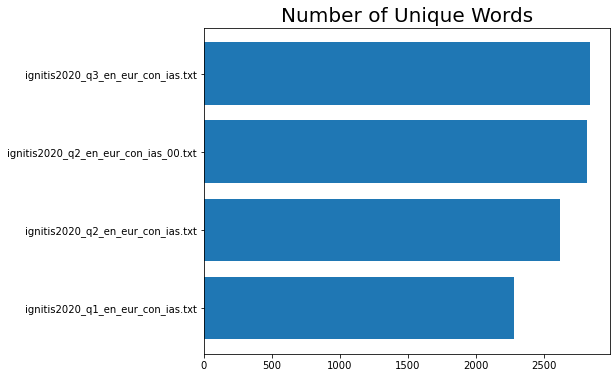

In [123]:

import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.quarters)
plt.title('Number of Unique Words', fontsize=20)

In [124]:
Counter(words)

Counter({'company': 4,
         'group': 4,
         'eur': 4,
         'electricity': 4,
         'ignitis': 4,
         'financial': 4,
         'uab': 4,
         'million': 4,
         'interim': 4,
         'gas': 4,
         'board': 3,
         'current': 4,
         'vilnius': 4,
         'management': 4,
         'statements': 4,
         'net': 2,
         'adjusted': 2,
         'revenue': 1,
         'generation': 2,
         'assets': 3,
         'lithuania': 4,
         'companys': 3,
         'customers': 2,
         'non': 3,
         'apm': 2,
         'income': 3,
         'march': 1,
         'member': 1,
         'report': 2,
         'period': 4,
         'ab': 3,
         'june': 2,
         'yes': 1,
         'shares': 2,
         'energy': 1,
         'total': 3,
         'cash': 3,
         'increased': 1,
         'year': 1,
         'consolidated': 1,
         'expenses': 2,
         'distribution': 1,
         'september': 1,
         'https': 1,
         'm

In [137]:
#lisan ESG'le vastavad sõnad, mida hakkan otsima tekstidest

query_E = ['Biodiversity', 'Carbon','Cleantech','Clean' , 'Climate' , 'Coal' , 'Conservation' , 'Ecosystem' , 'Emission' , 'Energy' , 'Fuel' , 'Green' , 'Land' , 'Natural' , 'Pollution' , 'Renewable' , 'Resources' , 'Sustainability' , 'Sustainable' , 'Toxic' , 'Waste' , 'Water']
E = [x.lower() for x in query_E]
query_S = ['Accident' , 'Alcohol' , 'Anti-personnel' , 'Behavior', 'Charity','Community' , 'Controversial' , 'Controversy' , 'Discrimination' , 'Gambling' , 'Health' , 'Human capital' , 'Human rights' , 'Inclusion' , 'Injury' , 'Lab','Munitions' , 'Opposition' , 'Pay' , 'Philanthropic' , 'Quality' , 'Responsible']
S = [x.lower() for x in query_S]
query_G = ['Advocacy' , 'Bribery' , 'Compensation' , 'Competitive' ,'Corruption' , 'Divestment' , 'Fraud' , 'GRI', 'Independent' , 'Justice' , 'Stability' , 'Stewardship' , 'Transparency']
G = [x.lower() for x in query_G]

In [140]:
print(G)


['advocacy', 'bribery', 'compensation', 'competitive', 'corruption', 'divestment', 'fraud', 'gri', 'independent', 'justice', 'stability', 'stewardship', 'transparency']
